In [47]:
from ML_prepare import *
from Kfold_CV import *

In [48]:
df_cohorts_2 = df[df['Cohort'] == 'D1_2']
df_cohorts_2['Individual'].unique()

array([ 9, 10, 11, 12, 13, 14], dtype=int64)

In [49]:
df_cohorts_1 = df[df['Cohort'] == 'D1_1']
df_cohorts_1['Individual'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [63]:
df_cohorts_2.iloc[:, 4:5]

,HR_Max
96,-0.528976
97,1.242915
98,-1.009076
99,-0.828351
100,-0.048090
...,...
163,0.351076
164,-1.172515
165,-1.291165
166,-1.020863


In [55]:
df_cohorts_2['Frustrated']

96     2
97     5
98     0
99     1
100    6
      ..
163    8
164    0
165    1
166    4
167    0
Name: Frustrated, Length: 72, dtype: int64

In [56]:
df_cohorts_2['Frustrated'].to_numpy()

array([2, 5, 0, 1, 6, 1, 4, 8, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 5, 0, 0,
       1, 0, 0, 3, 1, 1, 2, 1, 1, 3, 0, 2, 4, 0, 1, 4, 0, 1, 5, 1, 1, 8,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 0, 4, 0, 1, 6, 0,
       4, 8, 0, 1, 4, 0], dtype=int64)

In [57]:
cohort1 = log_model_f.score(df_cohorts_1.iloc[:, 4:5], df_cohorts_1['Frustrated'])
cohort2 = log_model_f.score(df_cohorts_2.iloc[:, 4:5], df_cohorts_2['Frustrated'])

In [58]:
display(cohort1, cohort2)

0.19791666666666666

0.3333333333333333

In [65]:
pred_cohort_1 = log_model_f.predict(df_cohorts_1.iloc[:, 4:5])
pred_cohort_2 = log_model_f.predict(df_cohorts_2.iloc[:, 4:5])
pred_cohort = log_model_f.predict(df.iloc[:, 4:5])

In [66]:
contingency_table = pd.crosstab(df['Cohort'], df['Frustrated'])
contingency_table


Frustrated,0,1,2,3,4,5,6,7,8
Cohort,,,,,,,,,
D1_1,8,18,24,13,17,11,3,2,0
D1_2,21,27,7,3,6,3,2,0,3


In [67]:
predictions = pd.DataFrame({'Predicted': pred_cohort, 'Actual': df['Frustrated']})
table1 = pd.crosstab(predictions['Predicted'], df['Cohort'])

table2 = pd.crosstab(predictions['Predicted'], predictions['Actual'])

table3 = pd.crosstab(predictions['Predicted'], [predictions['Actual'],df['Cohort']])
from sympy import *
table3

Actual       0         1         2         3         4         5         6  \
Cohort    D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1   
Predicted                                                                    
0            1    5    1    7    3    0    0    0    2    1    1    0    0   
1            7   16   17   19   20    7   12    3   14    5   10    3    3   
2            0    0    0    1    0    0    0    0    1    0    0    0    0   
3            0    0    0    0    1    0    1    0    0    0    0    0    0   

Actual            7    8  
Cohort    D1_2 D1_1 D1_2  
Predicted                 
0            1    1    0  
1            1    1    3  
2            0    0    0  
3            0    0    0

C:\Users\Bruger\AppData\Local\Temp\ipykernel_21312\132812096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohorts_1['Cohort_1'] = np.where(df_cohorts_1['Frustrated'] == pred_cohort_1, 1,0)
Traceback (most recent call last):
  File "C:\Users\Bruger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Bruger\AppData\Local\Temp\ipykernel_21312\132812096.py", line 9, in <module>
    cm_display.plot()
  File "C:\Users\Bruger\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-package

Unexpected exception formatting exception. Falling back to standard exception


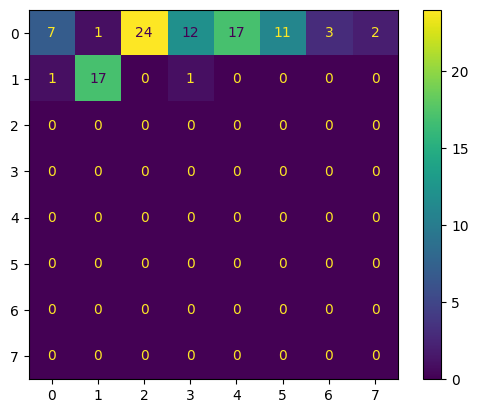

In [68]:
from sklearn import metrics

df_cohorts_1['Cohort_1'] = np.where(df_cohorts_1['Frustrated'] == pred_cohort_1, 1,0)


# Confusion matrix for cohort 1
confusion_matrix_cohort1 = metrics.confusion_matrix(df_cohorts_1['Cohort_1'], df_cohorts_1['Frustrated'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_cohort1, display_labels=['False','True'])
cm_display.plot()

# # Confusion matrix for cohort 2
# # confusion_matrix_cohort2 = metrics.confusion_matrix(df_cohorts_2['Frustrated'], pred_cohort_2)
# # cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_cohort2, display_labels=['False','True'])
# # cm_display.plot()